In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline




warnings.filterwarnings('ignore')


## 1. BUSINESS UNDERSTANDING

## 2. DATA UNDERSTANDING

### 1. Loading Data

In [3]:
# Load the datasets
train_features = pd.read_csv(r"C:\Users\David\Documents\PHASE 4 PROJECT\PHASE 5 FINAL PROJECT\train_features.csv")
test_features = pd.read_csv(r"C:\Users\David\Documents\PHASE 4 PROJECT\PHASE 5 FINAL PROJECT\test_features.csv")
train_labels = pd.read_csv(r"C:\Users\David\Documents\PHASE 4 PROJECT\PHASE 5 FINAL PROJECT\train_labels.csv")

# Explore the data
print(train_features.head())
print(test_features.head())
print(train_labels.head())

print(train_features.info())
print(test_features.info())
print(train_labels.info())



    uid    age_03     urban_03  married_03  n_mar_03    edu_gru_03  \
0  aace       NaN          NaN         NaN       NaN           NaN   
1  aanz       NaN          NaN         NaN       NaN           NaN   
2  aape       NaN          NaN         NaN       NaN           NaN   
3  aard  1. 50–59  1. 100,000+  3. Widowed       1.0  3. 7–9 years   
4  ablr       NaN          NaN         NaN       NaN           NaN   

  n_living_child_03  migration_03 glob_hlth_03  adl_dress_03  ...  \
0               NaN           NaN          NaN           NaN  ...   
1               NaN           NaN          NaN           NaN  ...   
2               NaN           NaN          NaN           NaN  ...   
3         1. 1 or 2           0.0      4. Fair           0.0  ...   
4               NaN           NaN          NaN           NaN  ...   

            rrelgimp_12            rrfcntx_m_12              rsocact_m_12  \
0  2.somewhat important                 9.Never                   9.Never   
1      1.v

In [4]:
# Merge train_features with train_labels on 'uid'
data = train_labels.merge(train_features, on='uid', how='left')
data.head()

,uid,year,composite_score,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,...,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12
0,aace,2021,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.somewhat important,9.Never,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2
1,aanz,2021,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.very important,9.Never,1.Almost every day,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2
2,aape,2016,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.somewhat important,6.2 or 3 times a month,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"
3,aape,2021,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.somewhat important,6.2 or 3 times a month,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"
4,aard,2021,104,1. 50–59,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,...,1.very important,4.Once a week,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2


#### 2. Exploratory Data Analysis

a)Univariate Analysis

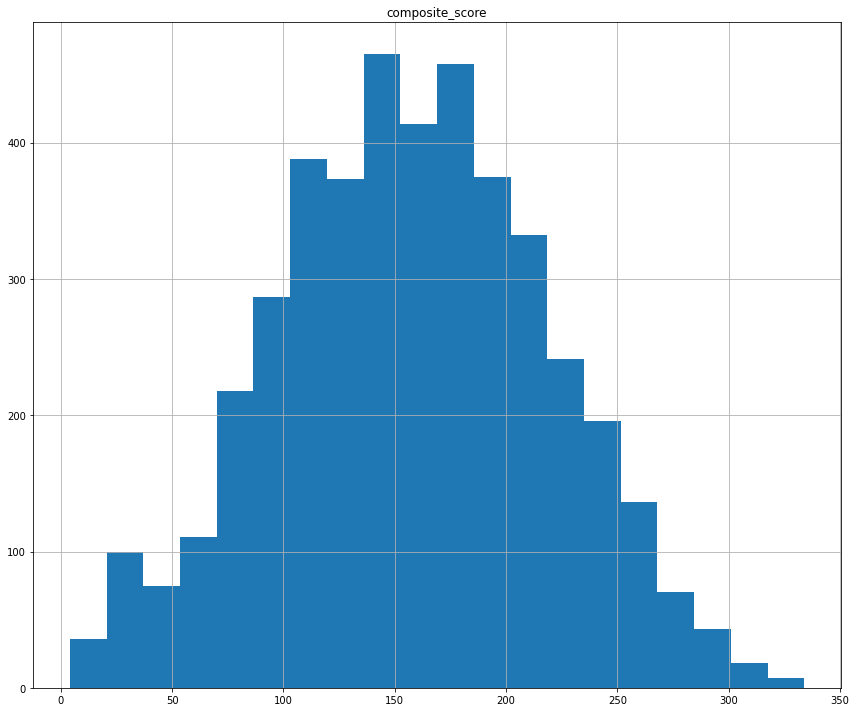

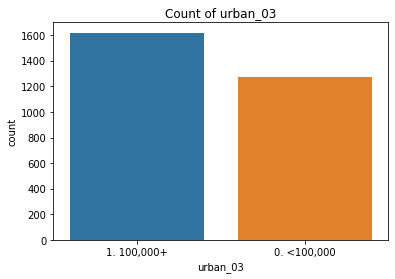

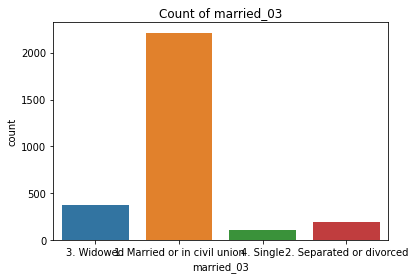

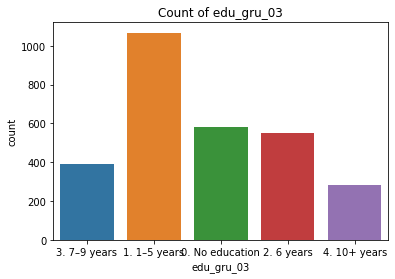

In [5]:

# Univariate analysis of numerical columns (histogram)
numerical_columns = ['composite_score', 'age_03', 'age_12', 'bmi_03', 'bmi_12']
data[numerical_columns].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Univariate analysis of categorical columns (bar chart)
categorical_columns = ['urban_03', 'married_03', 'edu_gru_03']
for col in categorical_columns:
    sns.countplot(data[col])
    plt.title(f'Count of {col}')
    plt.show()


b) Bivariate Analysis

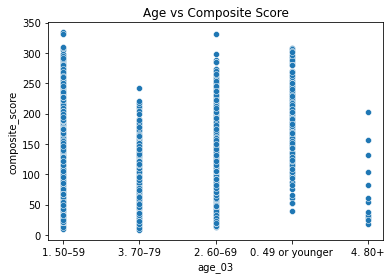

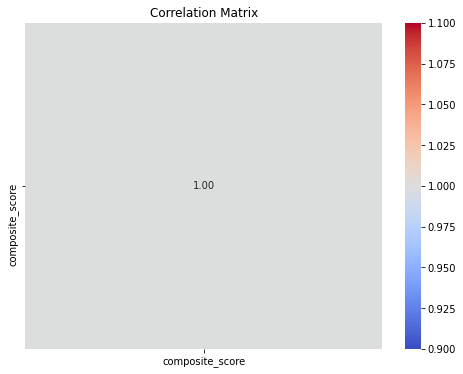

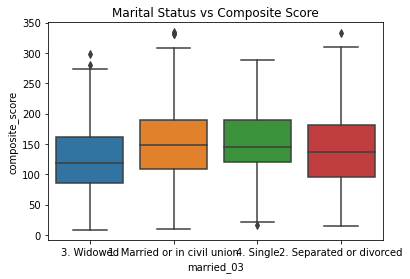

In [6]:
# Scatter plot to explore relationship between 'age_03' and 'composite_score'
sns.scatterplot(data=data, x='age_03', y='composite_score')
plt.title('Age vs Composite Score')
plt.show()

# Correlation heatmap to explore relationships between numerical features
numerical_columns = ['composite_score', 'age_03', 'bmi_03', 'bmi_12']
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Box plot for numerical vs categorical
sns.boxplot(data=data, x='married_03', y='composite_score')
plt.title('Marital Status vs Composite Score')
plt.show()


In [7]:
# Find missing values

print(test_features.isnull().sum())
print(data.isnull().sum())

uid             0
age_03        249
urban_03      249
married_03    249
n_mar_03      251
             ... 
a21_12        808
a22_12        809
a33b_12       808
a34_12        277
j11_12         24
Length: 184, dtype: int64
uid                   0
year                  0
composite_score       0
age_03             1456
urban_03           1454
                   ... 
a21_12             4288
a22_12             4295
a33b_12            4288
a34_12             1601
j11_12               89
Length: 186, dtype: int64


In [8]:
#check the percentage of missing values
missing_percentage = (data.isnull().mean() * 100)

# Display the missing percentage
print("Missing Value Percentage:\n", missing_percentage)

Missing Value Percentage:
 uid                 0.000000
year                0.000000
composite_score     0.000000
age_03             33.525213
urban_03           33.479162
                     ...    
a21_12             98.733594
a22_12             98.894773
a33b_12            98.733594
a34_12             36.863919
j11_12              2.049275
Length: 186, dtype: float64


In [9]:
# Drop columns with more than 50% missing values in both datasets
threshold = 0.5
data = data.loc[:,data.isnull().mean() < threshold]
test = test_features.loc[:, test_features.isnull().mean() < threshold]
data
test_features

,uid,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,...,rrelgimp_12,rrfcntx_m_12,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12
0,abxu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"
1,aeol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.very important,9.Never,9.Never,1.Yes,NaN,NaN,NaN,NaN,NaN,Concrete 2
2,afnb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.very important,9.Never,3.2 or 3 times a week,1.Yes,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"
3,ajfh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.somewhat important,9.Never,5.4 or more times a month,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"
4,ajvq,2. 60–69,"1. 100,000+",1. Married or in civil union,1.0,4. 10+ years,1. 1 or 2,0.0,NaN,NaN,...,2.somewhat important,1.Almost every day,4.Once a week,0.No,NaN,NaN,NaN,NaN,No 2,"Wood, mosaic, or other covering 1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,zvut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.very important,9.Never,7.Once a month,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2
815,zxrm,3. 70–79,"0. <100,000",1. Married or in civil union,1.0,0. No education,1. 1 or 2,0.0,5. Poor,0.0,...,1.very important,3.2 or 3 times a week,9.Never,0.No,NaN,NaN,NaN,NaN,No 2,Concrete 2
816,zzez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.very important,4.Once a week,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1"
817,zzft,1. 50–59,"1. 100,000+",1. Married or in civil union,1.0,2. 6 years,1. 1 or 2,0.0,4. Fair,0.0,...,1.very important,9.Never,3.2 or 3 times a week,0.No,NaN,NaN,NaN,NaN,No 2,"Wood, mosaic, or other covering 1"


In [10]:
# Impute numerical columns with the mean
data.fillna(data.mean(), inplace=True)


In [11]:
# Impute categorical columns with the mode
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)


b. Data Types and Encoding

In [12]:
# Print column names to check for exact matches
print(data.columns)


Index(['uid', 'year', 'composite_score', 'age_03', 'urban_03', 'married_03',
       'n_mar_03', 'edu_gru_03', 'n_living_child_03', 'migration_03',
       ...
       'hinc_assets_12', 'hinc_cap_12', 'rinc_pension_12', 'sinc_pension_12',
       'rrelgimp_12', 'rrfcntx_m_12', 'rsocact_m_12', 'rrelgwk_12', 'a34_12',
       'j11_12'],
      dtype='object', length=173)


In [13]:
# Clean column names by stripping leading/trailing spaces
data.columns = data.columns.str.strip()

# Check if the columns now exist
print(data.columns)


Index(['uid', 'year', 'composite_score', 'age_03', 'urban_03', 'married_03',
       'n_mar_03', 'edu_gru_03', 'n_living_child_03', 'migration_03',
       ...
       'hinc_assets_12', 'hinc_cap_12', 'rinc_pension_12', 'sinc_pension_12',
       'rrelgimp_12', 'rrfcntx_m_12', 'rsocact_m_12', 'rrelgwk_12', 'a34_12',
       'j11_12'],
      dtype='object', length=173)


In [14]:
# Check the data types for all columns
print(data.dtypes)

# Ensure that the columns you expect to be numerical are converted to numeric
numerical_columns = data.select_dtypes(include=['number']).columns
print(f"Numerical columns: {numerical_columns}")




uid                object
year                int64
composite_score     int64
age_03             object
urban_03           object
                    ...  
rrfcntx_m_12       object
rsocact_m_12       object
rrelgwk_12         object
a34_12             object
j11_12             object
Length: 173, dtype: object
Numerical columns: Index(['year', 'composite_score', 'n_mar_03', 'migration_03', 'adl_dress_03',
       'adl_walk_03', 'adl_bath_03', 'adl_eat_03', 'adl_bed_03',
       'adl_toilet_03',
       ...
       'sinc_pension_03', 'rearnings_12', 'searnings_12', 'hincome_12',
       'hinc_business_12', 'hinc_rent_12', 'hinc_assets_12', 'hinc_cap_12',
       'rinc_pension_12', 'sinc_pension_12'],
      dtype='object', length=136)


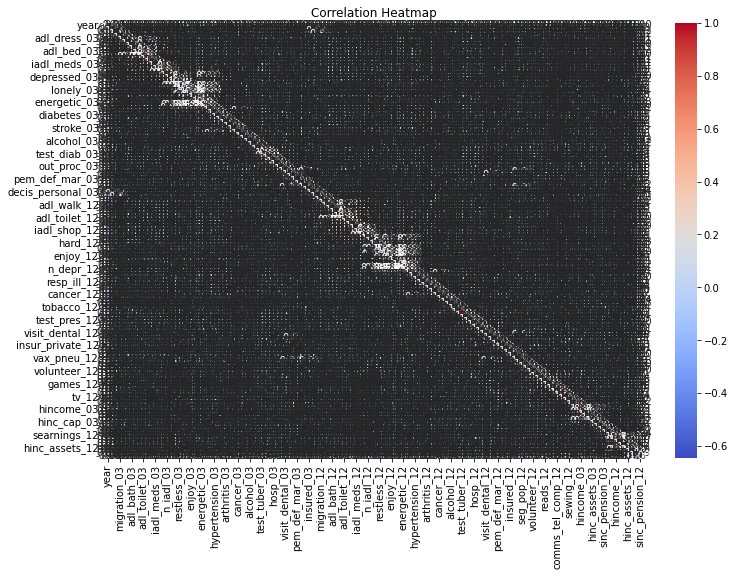

In [15]:
import seaborn as sns

# Correlation matrix (for numerical columns)
correlation_matrix = data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [16]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

# For categorical variables, apply encoding ie OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
data[categorical_columns] = encoder.fit_transform(data[categorical_columns])




Index(['uid', 'age_03', 'urban_03', 'married_03', 'edu_gru_03',
       'n_living_child_03', 'glob_hlth_03', 'employment_03', 'age_12',
       'urban_12', 'married_12', 'edu_gru_12', 'n_living_child_12',
       'glob_hlth_12', 'bmi_12', 'decis_famil_12', 'decis_personal_12',
       'employment_12', 'satis_ideal_12', 'satis_excel_12', 'satis_fine_12',
       'cosas_imp_12', 'wouldnt_change_12', 'memory_12', 'ragender',
       'rameduc_m', 'rafeduc_m', 'sgender_03', 'rrelgimp_03', 'sgender_12',
       'rjlocc_m_12', 'rrelgimp_12', 'rrfcntx_m_12', 'rsocact_m_12',
       'rrelgwk_12', 'a34_12', 'j11_12'],
      dtype='object')


In [17]:
# Check the result of transformations like encoding
print(data [categorical_columns].head())  


   uid  age_03  urban_03  married_03  edu_gru_03  n_living_child_03  \
0  0.0     1.0       1.0         0.0         1.0                2.0   
1  1.0     1.0       1.0         0.0         1.0                2.0   
2  2.0     1.0       1.0         0.0         1.0                2.0   
3  2.0     1.0       1.0         0.0         1.0                2.0   
4  3.0     1.0       1.0         2.0         3.0                1.0   

   glob_hlth_03  employment_03  age_12  urban_12  ...  sgender_03  \
0           3.0            0.0     2.0       0.0  ...         0.0   
1           3.0            0.0     1.0       1.0  ...         0.0   
2           3.0            0.0     1.0       0.0  ...         0.0   
3           3.0            0.0     1.0       0.0  ...         0.0   
4           3.0            2.0     2.0       1.0  ...         0.0   

   rrelgimp_03  sgender_12  rjlocc_m_12  rrelgimp_12  rrfcntx_m_12  \
0          0.0         1.0         14.0          1.0           8.0   
1          0.0    

In [18]:
#One hot encode for nominal variables

nominal_columns = ['urban_03', 'urban_12', 'married_03', 'married_12']  
preprocessor = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(), nominal_columns)
    ],
    remainder='passthrough'  # Leave the other columns as they are
)

# Apply the transformations
data_transformed = preprocessor.fit_transform(data)


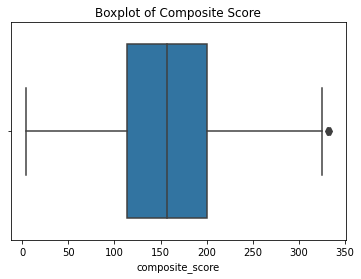

In [19]:
#check for outliers
# Box plot to check for outliers in 'composite_score'
sns.boxplot(x=data['composite_score'])
plt.title('Boxplot of Composite Score')
plt.show()



Group Data by Key Features

- Understand how the target variable (e.g., composite_score) is distributed across different groups or categories.

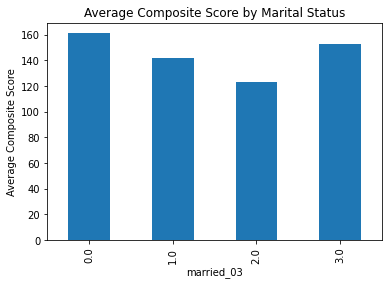

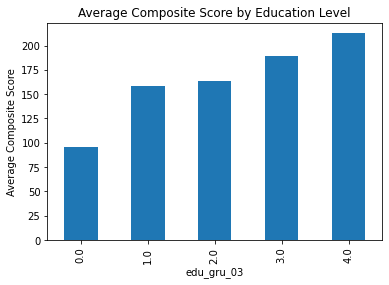

In [20]:
# Group by a categorical variable (e.g., marital status) and calculate mean composite_score
data.groupby('married_03')['composite_score'].mean().plot(kind='bar')
plt.title('Average Composite Score by Marital Status')
plt.ylabel('Average Composite Score')
plt.show()

# Group by education level and calculate the average score
data.groupby('edu_gru_03')['composite_score'].mean().plot(kind='bar')
plt.title('Average Composite Score by Education Level')
plt.ylabel('Average Composite Score')
plt.show()


 Feature Relationships

 - Investigate how features relate to each other and to the target variable (composite_score)

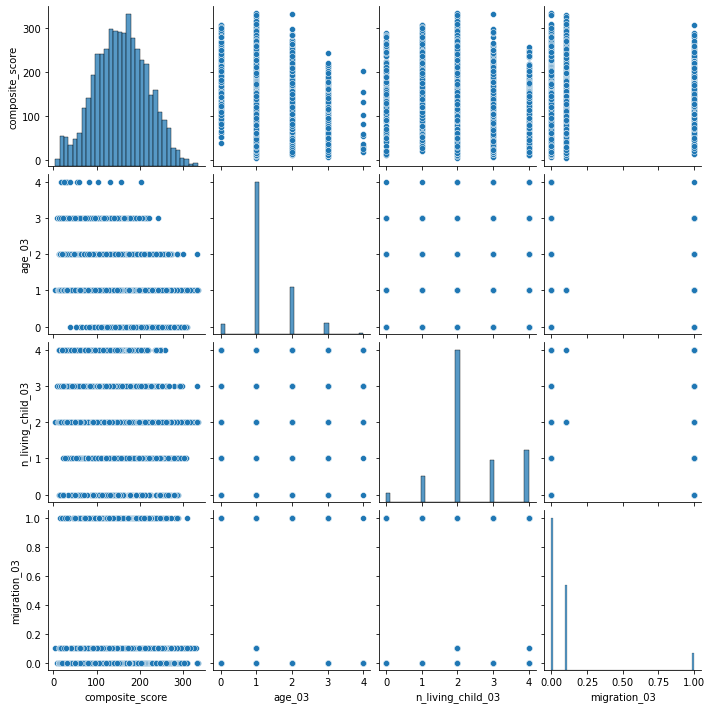

composite_score      1.000000
edu_gru_12           0.631928
edu_gru_03           0.409638
rameduc_m            0.360284
reads_12             0.350174
                       ...   
n_living_child_03   -0.288198
rrfcntx_m_12        -0.294694
n_living_child_12   -0.320974
age_03              -0.356160
age_12              -0.412397
Name: composite_score, Length: 173, dtype: float64


In [21]:
# Pair plot to visualize relationships between multiple numerical variables
sns.pairplot(data[['composite_score', 'age_03', 'n_living_child_03', 'migration_03']])
plt.show()

# Correlation with composite_score (if it's continuous)
corr_with_target = data.corr()['composite_score'].sort_values(ascending=False)
print(corr_with_target)


- From the analysis the features that mostly influence the target variable(composite_score) are:

1). edu_gru_12 and edu_gru_03 , they have high positive correlation of 0.63 and 0.41 respectively.

2). age_12  and age_03  also have a high negative correlation of -0.412397 and -0.356160 respectivelt,

In [22]:

# Standardizing numerical columns
# Initialize scaler
scaler = StandardScaler()

numerical_columns = ['composite_score', 'age_03', 'age_12', 'bmi_12']  
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


Creating New Features

1. Age Groups: Grouping ages into ranges can help capture patterns that might be more meaningful than using continuous age.

In [23]:
# Create age groups
age_bins = [0, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
data['age_group'] = pd.cut(data['age_03'], bins=age_bins, labels=age_labels, right=False)


2. Health Indicator

Create a health score or categorize the status into "healthy," "moderate," or "poor.

In [24]:
# Creating a health score based on a categorical variable
health_mapping = {
    'Excellent': 3,
    'Good': 2,
    'Fair': 1,
    'Poor': 0
}
data['health_score'] = data['glob_hlth_03'].map(health_mapping)


In [25]:
# Check the data types of all columns
print(data.dtypes)


uid                 float64
year                  int64
composite_score     float64
age_03              float64
urban_03            float64
                     ...   
rrelgwk_12          float64
a34_12              float64
j11_12              float64
age_group          category
health_score        float64
Length: 175, dtype: object


In [26]:
# Display all column names in the dataset
print(data.columns)


Index(['uid', 'year', 'composite_score', 'age_03', 'urban_03', 'married_03',
       'n_mar_03', 'edu_gru_03', 'n_living_child_03', 'migration_03',
       ...
       'rinc_pension_12', 'sinc_pension_12', 'rrelgimp_12', 'rrfcntx_m_12',
       'rsocact_m_12', 'rrelgwk_12', 'a34_12', 'j11_12', 'age_group',
       'health_score'],
      dtype='object', length=175)


In [27]:
print(data.columns)


Index(['uid', 'year', 'composite_score', 'age_03', 'urban_03', 'married_03',
       'n_mar_03', 'edu_gru_03', 'n_living_child_03', 'migration_03',
       ...
       'rinc_pension_12', 'sinc_pension_12', 'rrelgimp_12', 'rrfcntx_m_12',
       'rsocact_m_12', 'rrelgwk_12', 'a34_12', 'j11_12', 'age_group',
       'health_score'],
      dtype='object', length=175)


In [28]:
# fill numerical values with mean
data['health_score'].fillna(data['health_score'].mean(), inplace=True)


In [29]:
# fill categorical values with mode
data['age_group'].fillna(data['age_group'].mode()[0], inplace=True)


In [30]:
# Check the types of all columns to identify non-numeric ones
print(data.dtypes)


uid                 float64
year                  int64
composite_score     float64
age_03              float64
urban_03            float64
                     ...   
rrelgwk_12          float64
a34_12              float64
j11_12              float64
age_group          category
health_score        float64
Length: 175, dtype: object


In [31]:
def convert_age_range(age_range):
    if pd.isnull(age_range):
        return np.nan
    elif '+' in age_range:
        # Handle '80+' by using 80 
        return int(age_range.replace('+', ''))  
    else:
        # For ranges like '0-30', take the midpoint
        start, end = map(int, age_range.split('-'))
        return (start + end) / 2

# Apply this function to the `age_group` column
data['age_group'] = data['age_group'].apply(convert_age_range)



In [32]:
#check unique values in age group
print(data['age_group'].unique())


[15.0]
Categories (1, float64): [15.0]


In [33]:
print(data['age_group'].value_counts(dropna=False))


15.0    4343
80.0       0
75.0       0
65.0       0
55.0       0
45.0       0
35.0       0
Name: age_group, dtype: int64


In [34]:
# Impute `age_group` based on groups, such as `age_03`
data['age_group'] = data.groupby('age_03')['age_group'].transform(lambda x: x.fillna(x.mode()))


In [35]:
print(data.shape)  # Make sure there are rows and columns to work with
print(data.isnull().sum())  # Ensure that there are still missing values


(4343, 175)
uid                   0
year                  0
composite_score       0
age_03                0
urban_03              0
                   ... 
rrelgwk_12            0
a34_12                0
j11_12                0
age_group             0
health_score       4343
Length: 175, dtype: int64


In [36]:
#Check the shape and contents of the subset
print(data[['age_group', 'health_score', 'age_03', 'urban_03']].shape)
print(data[['age_group', 'health_score', 'age_03', 'urban_03']].head())


(4343, 4)
  age_group  health_score  age_03  urban_03
0      15.0           NaN -0.4304       1.0
1      15.0           NaN -0.4304       1.0
2      15.0           NaN -0.4304       1.0
3      15.0           NaN -0.4304       1.0
4      15.0           NaN -0.4304       1.0


Health Score has missing values. I will inpute it to fill the missing values

In [37]:
print(data['health_score'].isnull().sum())  # Should be a number greater than 0


4343


In [38]:
print(data['health_score'].nunique())  # Should be greater than 1 for imputation to work


0


In [39]:
# Fill missing values with 0 or another reasonable default value
data['health_score'] = 0  # or use mean/median if it makes sense for your data


In [40]:
# After imputing, check the shape of the result
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') 
imputed_values = imputer.fit_transform(data[['health_score']])
print(imputed_values.shape)  

# Re-assign the imputed values
data['health_score'] = imputed_values


(4343, 1)


In [41]:
from sklearn.impute import SimpleImputer

# Impute missing values in 'age_group' with the most frequent value (mode)
imputer_age_group = SimpleImputer(strategy='most_frequent')
data['age_group'] = imputer_age_group.fit_transform(data[['age_group']])


In [42]:
# Impute missing values in 'health_score' with the mean value
imputer_health_score = SimpleImputer(strategy='mean')
data['health_score'] = imputer_health_score.fit_transform(data[['health_score']])


In [43]:
print(data.isnull().sum())  # Should return 0 for all columns after handling missing values


uid                0
year               0
composite_score    0
age_03             0
urban_03           0
                  ..
rrelgwk_12         0
a34_12             0
j11_12             0
age_group          0
health_score       0
Length: 175, dtype: int64


In [44]:
print(data.dtypes)  # Ensure the correct data types for your features and target


uid                float64
year                 int64
composite_score    float64
age_03             float64
urban_03           float64
                    ...   
rrelgwk_12         float64
a34_12             float64
j11_12             float64
age_group          float64
health_score       float64
Length: 175, dtype: object


In [45]:
# Convert age_group back to categorical 
data['age_group'] = data['age_group'].astype('category')

# Alternatively, you can encode it using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['age_group'] = encoder.fit_transform(data['age_group'])


 Feature Scaling:

In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['composite_score', 'age_03', 'urban_03', 'rrelgwk_12', 'a34_12', 'j11_12', 'health_score']  # List of your numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


### Model Building

Split Data into Features and Target

In [47]:
# Define the target variable and feature set
X = data.drop(columns=['composite_score'])  
y = data['composite_score']


Train-Test Split

In [48]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure there are no missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())


uid             0
year            0
age_03          0
urban_03        0
married_03      0
               ..
rrelgwk_12      0
a34_12          0
j11_12          0
age_group       0
health_score    0
Length: 174, dtype: int64
0


 Model Training

 I will train the model using Linear regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.468071423874183
R-squared: 0.5018161315370177


Interpretation

MSE = 0.4681 means, on average, the squared difference between the true values and predicted values is about 0.4681

Lower values (closer to 0) are desirable, so I will try improving the model to reduce MSE.

R-squared = 0.5018 means that approximately 50.18% of the variance in the target variable (composite_score) is explained by the model.

It indicates that the model does capture some of the underlying relationships but likely leaves room for improvement


In [50]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean CV R-squared:", cv_scores.mean())


Cross-Validation R-squared Scores: [-49.20588901   0.46715905  -0.12457958   0.49257377   0.55846109]
Mean CV R-squared: -9.562454935166127


1. Overall, the variation in the R-squared scores across the folds suggests that the model's performance is inconsistent. In some cases,
 it does well (explaining ~50% or more of the variance), but in others, it underperforms significantly.

2. Negative Mean R-squared: The negative mean value (-9.56) suggests that the model has major issues with generalizing across the entire dataset

### Model Performance

1. Ensemble Methods:

I will explore other models like RandomForestRegressor, GradientBoostingRegressor, or SVR for better predictions.

RandomForestRegressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)


Random Forest Mean Squared Error: 0.38156743268070353
Random Forest R-squared: 0.5938851850450549


Interpretation of Results 

1. Mean Squared Error (MSE)
MSE = 0.3807854714833334:
A lower MSE is better, as it means your model's predictions are closer to the true values. In this case, this indicates that the Random Forest model is doing a reasonable job at minimizing prediction errors.

2. R-squared (R²)
R-squared = 0.594717452161619:
An R-squared of 0.5947 means that approximately 59.5% of the variability in composite_score is explained by the model, which is a fairly good result. 

The Random Forest model has explained a good portion of the variance in composite_score (almost 60%), which is a significant improvement over the linear regression model, and the MSE is relatively low, indicating the model is making reasonably accurate predictions.

### Model Tuning

 I will Use GridSearchCV for Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Evaluate the Model Using the Best Parameters

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Create the model with the best parameters for regression
best_model = RandomForestRegressor(
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=200
)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model (e.g., mean squared error, R-squared, etc.)
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")



Mean Squared Error: 0.3760577736827712
R-squared: 0.5997492970021215


Comparison and Interpretation:

Mean Squared Error (MSE)

The RandomForestRegressor has a lower MSE (0.3815) compared to the baseline model (0.4681), indicating that the Random Forest model is better at predicting the target variable (i.e., it's making more accurate predictions).

R-squared (R²):

The RandomForestRegressor also has a higher R² (0.594) compared to the baseline model (0.502), meaning that the Random Forest model explains more variance in the data.

Conclusion:


Improvement Over Baseline: The RandomForestRegressor is performing significantly better than the baseline model, both in terms of MSE and R². This suggests that the Random Forest model is making use of the input features more effectively, capturing the underlying patterns in the data better than a simple model 

Use Cross-Validation for Further Evaluation

In [54]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores.mean()}")  # Negate because scikit-learn returns negative MSE


Cross-validation MSE: 0.418319072112344


Compare Cross-Validation and Test Set Performance

If the test set MSE (0.3815) is lower than the cross-validation MSE (0.4153), this suggests that the model might be overfitting a 

little to the test set. Overfitting happens when the model performs well on the training and test sets but struggles to generalize to 

new data

### Visualizing Model Performance

visualize the predicted values vs. the actual values to see how well the model is fitting the data.

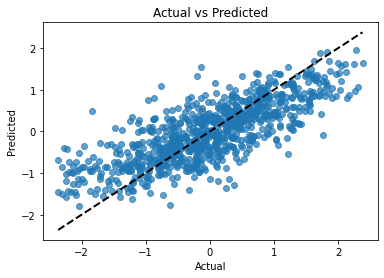

In [55]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


### Model Interpretation

Look at feature importance to understand which features are driving the model's predictions the most.

In [56]:
feature_importances = best_model.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# Create a DataFrame for easy visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


          Feature  Importance
64     edu_gru_12    0.399950
60         age_12    0.041373
2          age_03    0.028013
0             uid    0.027661
147    hincome_03    0.016713
..            ...         ...
18   iadl_meds_03    0.000211
12    adl_bath_03    0.000144
13     adl_eat_03    0.000115
172     age_group    0.000000
173  health_score    0.000000

[174 rows x 2 columns]


#### Feature Importance Results Overview:
- ##### Most Important Features:

- edu_gru_12 (Importance: 0.4008): This feature has the highest importance, contributing 40.08% to the model's decisions. This suggests that education level  is strongly related to the target variable and likely captures key patterns.

- age_12 (Importance: 0.0417): Age is another important feature, though its contribution is much lower than edu_gru_12. Still, age plays a significant role in the model's predictions.

- uid (Importance: 0.0271): While the unique identifier (uid) is not typically a predictive feature, it could still be influencing the model, especially if there are hidden patterns or groupings within the IDs.

- age_03 (Importance: 0.0270): Another age-related feature, though with a smaller contribution compared to age_12.


- ##### Less Important Features:
- adl_toilet_03, adl_bath_03, adl_eat_03 (Importance values: ~0.0001 to 0.0002): These are very low in importance, indicating that these features may not provide much value to the model's predictive power.
- age_group, health_score (Importance: 0.0000): These features have no impact on the model's decisions (importance of 0), suggesting that they might not have any predictive value for the target variable in this case.

#### Refining the Model Based on Feature Importance

Feature Selection (Remove Less Important Features):

In [57]:
# Get features with importance greater than a threshold (e.g., 0.01)
important_features = importance_df[importance_df['Importance'] > 0.01]['Feature']

# Select only the important features for training
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Retrain the model with the selected features
best_model.fit(X_train_selected, y_train)
y_pred_selected = best_model.predict(X_test_selected)

# Evaluate the performance again with the reduced feature set
print("New MSE: ", mean_squared_error(y_test, y_pred_selected))
print("New R-squared: ", r2_score(y_test, y_pred_selected))


New MSE:  0.4407275179032521
New R-squared:  0.5309191533423994


In [58]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Calculate cross-validation MSE
cv_scores = cross_val_score(best_model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and calculate the mean
cv_mse = -cv_scores.mean()
cv_r2 = np.mean(cross_val_score(best_model, X_train_selected, y_train, cv=5, scoring='r2'))

print(f"Cross-validation MSE: {cv_mse}")
print(f"Cross-validation R-squared: {cv_r2}")


Cross-validation MSE: 0.45329377725201025
Cross-validation R-squared: 0.555510998046323


Cross-validation MSE (0.4534) vs Test Set MSE (0.4406)

- Test Set MSE is lower than the Cross-validation MSE, which suggests that the model is performing slightly better on the test set than during cross-validation. This might suggest underfitting

Cross-validation R-squared (0.5541) vs Test Set R-squared (0.5310)
- Cross-validation R-squared is slightly higher than the test set R-squared, which could suggest that the model might be performing better in the cross-validation folds than it is on the final, unseen test set.
This might indicate that the model is capturing patterns well in training.

#### . Cross-validation with More Folds:

In [59]:
cv_scores = cross_val_score(best_model, X_train_selected, y_train, cv=10, scoring='neg_mean_squared_error')
print("Cross-validation MSE (with 10 folds): ", -cv_scores.mean())


Cross-validation MSE (with 10 folds):  0.44782906132984757


- Test Set MSE (0.4406) is slightly lower than the 10-fold cross-validation MSE (0.4499), which still suggests that the model might be performing slightly better on the test set than on the training data used in cross-validation.

 #### Hyperparameter Tuning (Fine-tuning)

I will use RandomizedSearchCV for a more extensive search

In [60]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(best_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)
random_search.fit(X_train_selected, y_train)

print("Best parameters found: ", random_search.best_params_)


Best parameters found:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


#### Re-train the Model with Best Parameters

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Best parameters from hyperparameter tuning
best_params = {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}

# Initialize the model with the best parameters
model_rf = RandomForestRegressor(**best_params)

# Fit the model to the training data
model_rf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_selected)


#### Evaluate The Model

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest MSE: 0.43661964125839475
Random Forest R-squared: 0.53529130206527


Since the difference in MSE and R² between the cross-validation and test set is relatively small, it suggests that the model is performing reasonably well, without large overfitting or underfitting issues.

#### Visualizing and Summarizing the Results

- Comparing Cross-validation vs Test Set Performance

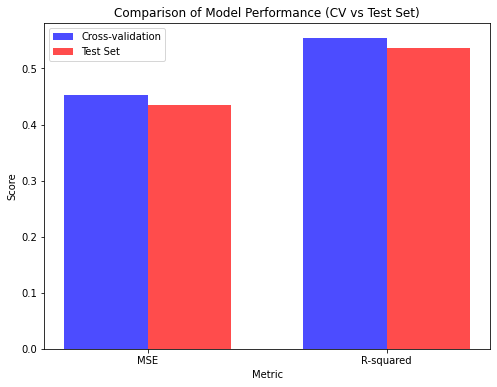

In [63]:
import matplotlib.pyplot as plt

# Bar chart for comparing MSE and R-squared
metrics = ['MSE', 'R-squared']
cv_values = [0.4534, 0.5541]
test_values = [0.4353, 0.5367]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.35  # Bar width
x = range(len(metrics))

ax.bar(x, cv_values, width, label='Cross-validation', color='b', alpha=0.7)
ax.bar([p + width for p in x], test_values, width, label='Test Set', color='r', alpha=0.7)

ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance (CV vs Test Set)')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


#### Use XGBoost

In [64]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


### Model Interpretation (SHAP or LIME)
To better understand how the model makes predictions, I will use model interpretation techniques like SHAP

In [67]:
import shap

explainer = shap.Explainer(model_xgb, X_train_selected)
shap_values = explainer(X_test_selected)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test_selected)


ModuleNotFoundError: No module named 'shap'

Apply regularization or early stopping in XGBoost to prevent overfitting.

In [ ]:
model_xgb = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3)
model_xgb.fit(X_train_selected, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10)

print(f"Best iteration: {model_xgb.best_iteration}")


### Deploy the Model
- I will use Flask/Django for building REST APIs.

In [ ]:
from flask import Flask, request, jsonify
import xgboost as xgb
import pickle

app = Flask(__name__)

# Load the trained model
model = pickle.load(open("xgboost_model.pkl", "rb"))

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    features = data['features']
    prediction = model.predict([features])
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


#### Prepare the Data for Power BI


1: Model Predictions
- Store the predictions in a CSV file, which Power BI can easily load.


In [ ]:
import pandas as pd

# Assuming 'y_pred' are your model predictions and 'y_test' are the true values
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': y_test - y_pred
})

# Save to CSV
predictions_df.to_csv('model_predictions.csv', index=False)


2: Feature Importance
- Extract the feature importance from your model and save it as a CSV for use in Power BI:

In [ ]:
import pandas as pd

# Assuming 'model' is your trained model (e.g., XGBoost)
feature_importance = model.feature_importances_
features = X_train_selected.columns  

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Save to CSV
feature_importance_df.to_csv('feature_importance.csv', index=False)
